<a href="https://colab.research.google.com/github/l-e13/wnba/blob/main/wnba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! git clone https://github.com/l-e13/wnba

Cloning into 'wnba'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 22 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (22/22), 601.56 KiB | 5.47 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [ ]:
%cd wnba

/content/wnba


In [ ]:
import pandas as pd

draftdf = pd.read_csv('wnbadraft.csv')
draftdf.head()

,overall_pick,year,team,player,former,college,years_played,games,win_shares,win_shares_40,minutes_played,points,total_rebounds,assists
0,1,2022,Atlanta Dream,Rhyne Howard,NaN,Kentucky,1,34.0,2.9,0.110,31.4,16.2,4.5,2.8
1,2,2022,Indiana Fever,NaLyssa Smith,NaN,Baylor,1,32.0,0.0,-0.001,30.7,13.5,7.9,1.4
2,3,2022,Washington Mystics,Shakira Austin,NaN,Ole Miss,1,36.0,3.1,0.160,21.6,8.7,6.5,0.9
3,4,2022,Indiana Fever,Emily Engstler,NaN,Louisville,1,35.0,0.4,0.024,18.2,5.2,5.2,1.5
4,5,2022,New York Liberty,Nyara Sabally,NaN,Oregon,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Cleaning

In [ ]:
# check type
draftdf.dtypes

,0
overall_pick,int64
year,int64
team,object
player,object
former,object
college,object
years_played,int64
games,float64
win_shares,float64
win_shares_40,float64


In [ ]:
# check NaNs
draftdf.isnull().sum()

# replace nans in former
draftdf['former'] = draftdf['former'].fillna('US college')

# replace nans in college
draftdf['college'] = draftdf['college'].fillna('International')

# exploring rows with missing players
draftdf[draftdf['player'].isna()]
draftdf = draftdf.dropna(subset=['player']) # dropping 2 rows with missing values

# replace nans with 0
draftdf[['games', 'win_shares', 'win_shares_40', 'points', 'total_rebounds', 'minutes_played', 'assists']] = draftdf[['games', 'win_shares', 'win_shares_40', 'points', 'total_rebounds', 'minutes_played', 'assists']].fillna(0)

draftdf.isnull().sum()



<ipython-input-6-9fa48bf67332>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  draftdf[['games', 'win_shares', 'win_shares_40', 'points', 'total_rebounds', 'minutes_played', 'assists']] = draftdf[['games', 'win_shares', 'win_shares_40', 'points', 'total_rebounds', 'minutes_played', 'assists']].fillna(0)


,0
overall_pick,0
year,0
team,0
player,0
former,0
college,0
years_played,0
games,0
win_shares,0
win_shares_40,0


## Visualizations

<ipython-input-30-3eb21404fa98>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('Oranges', len(team_top_picks))


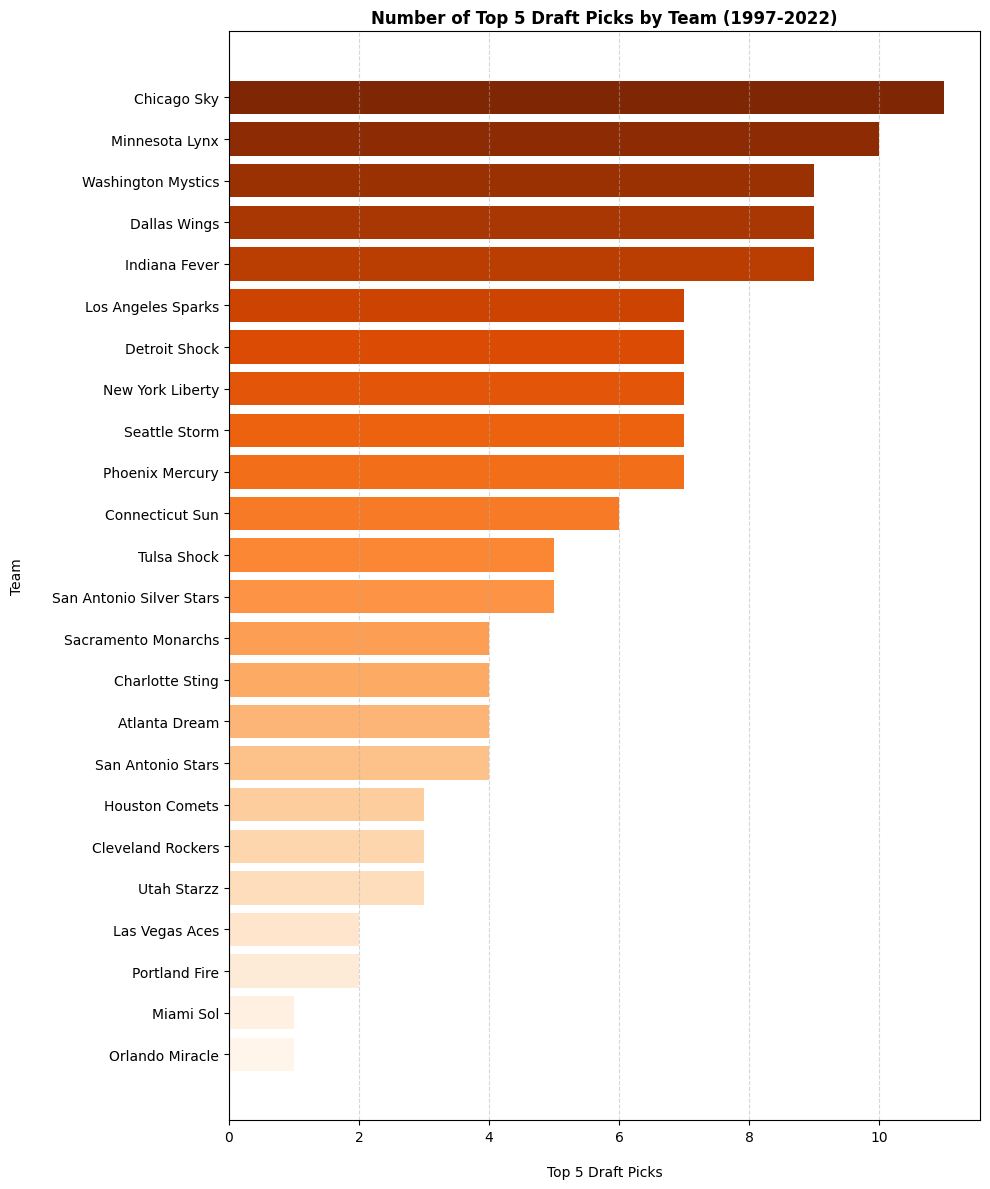

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# get top 5 draft picks
top5 = draftdf[draftdf['overall_pick'] <= 5]
team_top_picks = top5['team'].value_counts().reset_index()
team_top_picks.columns = ['team', 'top_5_count']

team_top_picks = team_top_picks.sort_values(by='top_5_count', ascending=True)

colors = cm.get_cmap('Oranges', len(team_top_picks))

plt.figure(figsize=(10, 12))
plt.barh(team_top_picks['team'], team_top_picks['top_5_count'], color=colors(range(len(team_top_picks))))
plt.title('Number of Top 5 Draft Picks by Team (1997-2022)', fontweight='bold')
plt.xlabel('Top 5 Draft Picks', labelpad = 15)
plt.ylabel('Team', labelpad=20)
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


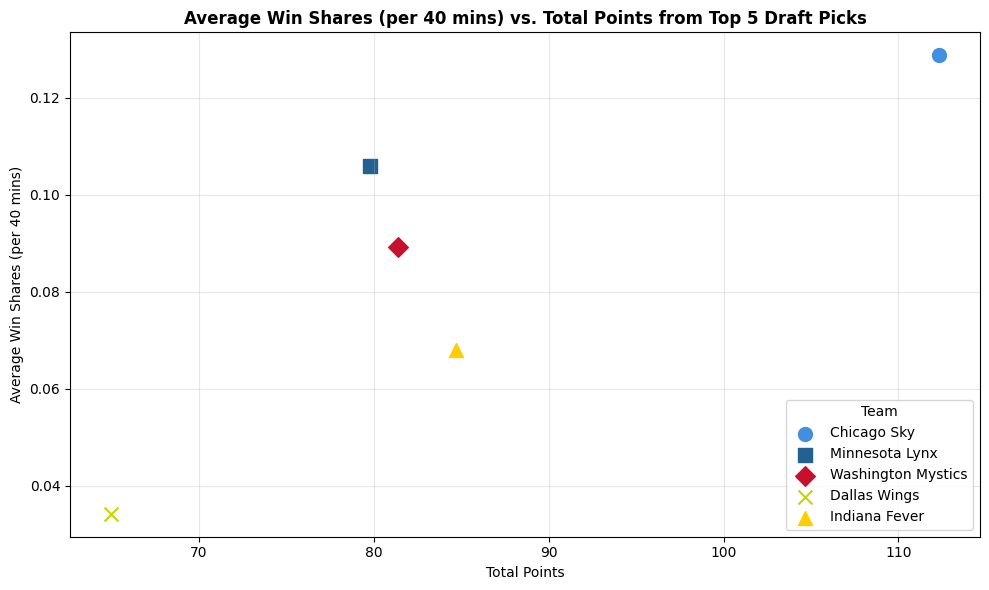

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

teams = {
    'Chicago Sky': '#418FDE',
    'Minnesota Lynx': '#236192',
    'Washington Mystics': '#c8102e',
    'Dallas Wings': '#c4d600',
    'Indiana Fever': '#FFCD00'
}

markers = {
    'Chicago Sky': 'o',
    'Minnesota Lynx': 's',
    'Washington Mystics': 'D',
    'Dallas Wings': 'x',
    'Indiana Fever': '^'
}

top5_picks = draftdf[(draftdf['overall_pick'] <= 5) & (draftdf['team'].isin(teams.keys()))]
performance_summary = top5_picks.groupby('team').agg({
    'points': 'sum',
    'win_shares_40': 'mean'
}).reset_index()
plt.figure(figsize=(10, 6))

for team, color in teams.items():
    team_data = performance_summary[performance_summary['team'] == team]
    plt.scatter(
        team_data['points'],
        team_data['win_shares_40'],
        color=color,
        s=100,
        label=team,
        marker=markers[team]
    )

plt.title('Average Win Shares (per 40 mins) vs. Total Points from Top 5 Draft Picks', fontweight='bold')
plt.xlabel('Total Points')
plt.ylabel('Average Win Shares (per 40 mins)')
plt.grid(alpha=0.3)
plt.legend(title='Team', loc='lower right')
plt.tight_layout()
plt.show()


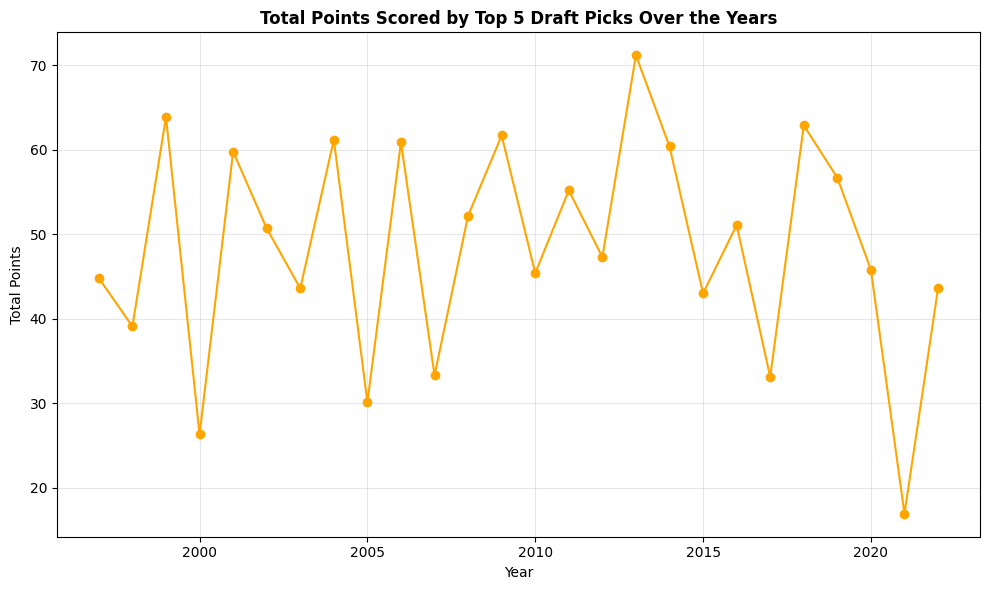

In [ ]:
total_points_per_year = top5_picks.groupby('year')['points'].sum()
plt.figure(figsize=(10, 6))
total_points_per_year.plot(kind='line', marker='o', color='orange')
plt.title('Total Points Scored by Top 5 Draft Picks Over the Years', fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Total Points')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

correlation_data = draftdf[['overall_pick', 'win_shares', 'win_shares_40', 'points', 'assists', 'total_rebounds']]
correlation_matrix = correlation_data.corr()
correlation_with_draft_pick = correlation_matrix.loc['overall_pick']
correlation_table = correlation_with_draft_pick.reset_index()
correlation_table.columns = ['Performance Metric', 'Correlation with Overall Pick']
correlation_table['Performance Metric'] = correlation_table['Performance Metric'].replace({
    'overall_pick': 'Overall Pick',
    'win_shares': 'Win Shares',
    'win_shares_40': 'Win Shares per 40 Mins',
    'points': 'Total Points',
    'assists': 'Total Assists',
    'total_rebounds': 'Total Rebounds'
})

correlation_table.set_index('Performance Metric', inplace=True)
correlation_table


,Correlation with Overall Pick
Performance Metric,
Overall Pick,1.000000
Win Shares,-0.398319
Win Shares per 40 Mins,-0.226443
Total Points,-0.589076
Total Assists,-0.463342
Total Rebounds,-0.557584
